In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline # plot in cell
from sklearn import metrics
import pandas as pd
from scipy import signal
from scipy import stats

import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

feature_names = ['mean_x', 'mean_y', 'mean_z', 
                'rms_x', 'rms_y', 'rms_z',
                'std_x', 'std_y', 'std_z',
                'med_x', 'med_y', 'med_z',
                'min_x', 'min_y', 'min_z',
                'max_x', 'max_y', 'max_z']

target_names = ['Standing', 'Walking', 'Sitting', 'Jogging']
              
def featuresFromBuffer(at):
    feat = np.zeros(18)    # return array float([ 0.,  0.,  0.,  0., ....., 0.])
                            # a vector of 21 features from each window
    x = np.array(at.iloc[:,0], dtype=np.float64)   
    y = np.array(at.iloc[:,1], dtype=np.float64)   
    z = np.array(at.iloc[:,2], dtype=np.float64)  
     
    means = [np.mean(i) for i in [x, y, z]]
    feat[0:3] = means
    
    rms = [np.sqrt(np.mean(i**2)) for i in [x, y, z]]
    feat[3:6] = rms
    
    # Standard deviation
    std = [np.std(i) for i in [x, y, z]]
    feat[6:9] = std

    # Median
    med = [np.median(i) for i in [x, y, z]]
    feat[9:12] = med
    
    # Range
    Range1 = [ np.amin(i) for i in [x, y, z]]    
    feat[12:15] = Range1
    Range2 = [ np.amax(i) for i in [x, y, z]]    
    feat[15:18] = Range2

    return feat  

In [2]:
import pandas as pd

data = pd.read_excel(r'F:\Program\OneDrive\TLNC\ISI\data\data.xlsx')
data.columns
data

Index(['Person', 'State', 'x', 'y', 'z'], dtype='object')

,Person,State,x,y,z
0,33.0,Jogging,-0.694638,12.680544,0.503953
1,33.0,Jogging,5.012288,11.264028,0.953424
2,33.0,Jogging,4.903325,10.882658,-0.081722
3,33.0,Jogging,-0.612916,18.496431,3.023717
4,33.0,Jogging,-1.184970,12.108489,7.205164
...,...,...,...,...,...
1048570,7.0,Standing,-8.080000,5.090000,-0.690000
1048571,7.0,Standing,-8.120000,5.520000,-0.800000
1048572,7.0,Standing,-7.890000,5.790000,-0.720000
1048573,7.0,Standing,-7.890000,5.980000,-0.270000


In [3]:
data = data.drop(columns = 'Person')
data


,State,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164
...,...,...,...,...
1048570,Standing,-8.080000,5.090000,-0.690000
1048571,Standing,-8.120000,5.520000,-0.800000
1048572,Standing,-7.890000,5.790000,-0.720000
1048573,Standing,-7.890000,5.980000,-0.270000


In [4]:
df = data.groupby(['State'])
df.first()

,x,y,z
State,,,
Downstairs,-0.040861,4.985047,6.510526
Jogging,-0.694638,12.680544,0.503953
Sitting,2.600000,9.660000,1.035146
Standing,-1.880000,9.850000,-0.231546
Upstairs,10.119919,4.331271,-3.786457
Walking,0.844462,8.008764,2.792171


In [5]:
Standing = df.get_group(('Standing'))
Walking = df.get_group(('Walking'))
Sitting = df.get_group(('Sitting'))
Jogging = df.get_group(('Jogging'))

len(Standing)
len(Walking)
len(Sitting)
len(Jogging)

44541

406776

54876

325975

In [6]:
Standing.isnull().sum().sum()
Walking.isnull().sum().sum()
Sitting.isnull().sum().sum()
Jogging.isnull().sum().sum()

0

1

0

0

In [7]:
#Check nan value & remove 
len(Walking.index)

Walking = Walking.dropna()
Walking.index = pd.RangeIndex(len(Walking.index))
len(Walking.index)
Walking.isnull().sum().sum()

type(Walking)

406776

406775

0

pandas.core.frame.DataFrame

In [19]:
# Caculate statistic value

#list = [Standing['x'],Walking['x'],Sitting['x'],Jogging['x']]
#list = [Standing['y'],Walking['y'],Sitting['y'],Jogging['y']]
list = [Standing['z'],Walking['z'],Sitting['z'],Jogging['z']]
    
print ('mean')
for index in list: 
    mean = np.mean(index)
    print (mean)
print ('\n\n')

print('std')
for index in list: 
    std = np.std(index) 
    print(std)
print ('\n\n')

print('med')
for index in list: 
    med = np.median(index) 
    print(med)
print ('\n\n')

print('Range')
for index in list: 
    Range = np.amax(index) - np.amin(index)
    print(Range)
print ('\n\n')

print('rms')
for index in list: 
    rms = np.sqrt(np.mean(index**2))
    print(rms)
print ('\n\n')


mean
0.7123696006178127
-0.08885436366429107
6.747458934485568
-0.087221040050599



std
1.3437294519530525
4.035316623974935
3.7877550031225464
5.904362366990912



med
0.8036005
-0.5
8.2
-0.23



Range
11.39
38.61
24.79
39.41



rms
1.520881089346052
4.036294755548788
7.737912511540111
5.9050065597394585





In [8]:
# Split dataset to 2 parts: Train (60%) - Test (40%)\n",

window_size = 16
stride = 8 #step

# range (start, stop, step)
X_stand_train = [Standing[i:i+window_size] for i in range(0, int(len(Standing)*0.6), stride)] 
X_stand_test = [Standing[i:i+window_size] for i in range(int(len(Standing)*0.6), len(Standing), stride) 
                                            if i+window_size<=len(Standing)]

X_walk_train = [Walking[i:i+window_size] for i in range(0, int(len(Walking)*0.6), stride)]
X_walk_test = [Walking[i:i+window_size] for i in range(int(len(Walking)*0.6), len(Walking),stride)
                                           if i+window_size<=len(Walking)]

X_sit_train = [Sitting[i:i+window_size] for i in range(0, int(len(Sitting)*0.6), stride)]
X_sit_test = [Sitting[i:i+window_size] for i in range(int(len(Sitting)*0.6), len(Sitting),stride)
                                           if i+window_size<=len(Sitting)]

X_jog_train = [Jogging[i:i+window_size] for i in range(0, int(len(Jogging)*0.6), stride)] 
X_jog_test = [Jogging[i:i+window_size] for i in range(int(len(Jogging)*0.6), len(Jogging), stride) 
                                            if i+window_size<=len(Jogging)]

print ('X_stand_train: ', len(X_stand_train))
print ('X_stand_test: ', len(X_stand_test))

print ('X_walk_train: ', len(X_walk_train))
print ('X_walk_test: ', len(X_walk_test))

print ('X_sit_train: ', len(X_sit_train))
print ('X_sit_test: ', len(X_sit_test))

print ('X_jog_train: ', len(X_jog_train))
print ('X_jog_test: ', len(X_jog_test))

X_stand_train:  3341
X_stand_test:  2226
X_walk_train:  30509
X_walk_test:  20337
X_sit_train:  4116
X_sit_test:  2742
X_jog_train:  24449
X_jog_test:  16297


In [9]:
train_data = []
train_label = []

test_data = []
test_label = []

for acts in X_stand_train:
    train_data.append(acts)
    train_label.append(0)
    
for acts in X_walk_train:
    train_data.append(acts)
    train_label.append(1)

for acts in X_sit_train:
    train_data.append(acts)
    train_label.append(2)
    
for acts in X_jog_train:
    train_data.append(acts)
    train_label.append(3)

print('train-data length: ', len(train_data) )
print('train-label length: ', len(train_label) )
#print(train_label)
      
# For TEST

for acts in X_stand_test:
    test_data.append(acts)
    test_label.append(0)

for acts in X_walk_test:
    test_data.append(acts)
    test_label.append(1)

for acts in X_sit_test:
    test_data.append(acts)
    test_label.append(2)
        
for acts in X_jog_test:
    test_data.append(acts)
    test_label.append(3)

print('test-data length: ', len(test_data))
print('test-label length: ', len(test_label))

train-data length:  62415
train-label length:  62415
test-data length:  41602
test-label length:  41602


In [10]:
# Tạo mảng features 
train_features = []
test_features = []
for action in train_data:
    feat = featuresFromBuffer(action)
    train_features.append(feat)  

for action in test_data:
    feat = featuresFromBuffer(action)
    test_features.append(feat)

len(train_features)
len(test_features)

62415

41602

In [11]:
#lower accuracy (nan value -> 0)
np.where(np.isnan(train_features)) 
train_features = np.nan_to_num(train_features)
np.where(np.isnan(test_features))
test_features = np.nan_to_num(test_features)      

len(train_features)
len(train_label)

(array([], dtype=int64), array([], dtype=int64))

(array([], dtype=int64), array([], dtype=int64))

62415

62415

In [13]:
#Classifier 

from sklearn.feature_selection import SelectFromModel
print("Gradient Boosting Decision Tree:")
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(learning_rate=0.05,max_depth=3,n_estimators=100).fit(train_features, train_label)
#format: pass score in {:.3f}
print('Accuracy of GBDT classifier on training set: {:.3f}'
     .format(clf1.score(train_features, train_label)))
print('Accuracy of GBDT classifier on test set: {:.3f}'
     .format(clf1.score(test_features, test_label)))


print("\n\nDecision Tree:") 
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree 

clf2 = DecisionTreeClassifier(max_depth=4).fit(train_features, train_label)

print('Accuracy of Decision Tree classifier on training set: {:.3f}'.format(clf2.score(train_features, train_label)))
print('Accuracy of Decision Tree classifier on test set: {:.3f}'
.format(clf2.score(test_features, test_label)))


print("\n\nSVM:")
clf3 = SVC(C=100, gamma='scale').fit(train_features, train_label)
print("Accuracy on training set: {:.2f}".format(clf3.score(train_features, train_label)))
print("Accuracy on test set: {:.2f}".format(clf3.score(test_features, test_label)))


print('\n\n Random Forests: ')
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(n_estimators=200, random_state=0).fit(train_features, train_label)

print('Accuracy of RF classifier on training set: {:.3f}'
     .format(clf4.score(train_features, train_label)))
print('Accuracy of RF classifier on test set: {:.3f}'
     .format(clf4.score(test_features, test_label)))


print('\n\n KNeighbor: ')
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance').fit(train_features, train_label)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(train_features, train_label)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(test_features, test_label)))


Gradient Boosting Decision Tree:
Accuracy of GBDT classifier on training set: 0.989
Accuracy of GBDT classifier on test set: 0.918


Decision Tree:
Accuracy of Decision Tree classifier on training set: 0.974
Accuracy of Decision Tree classifier on test set: 0.912


SVM:
Accuracy on training set: 0.99
Accuracy on test set: 0.91


 Random Forests: 
Accuracy of RF classifier on training set: 1.000
Accuracy of RF classifier on test set: 0.912


 KNeighbor: 
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.89


In [22]:
from sklearn.feature_selection import SelectFromModel
print("Gradient Boosting Decision Tree:")
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(learning_rate=0.05,max_depth=3,n_estimators=100).fit(train_features, train_label)
#format: pass score in {:.3f}
print('Accuracy of GBDT classifier on training set: {:.3f}'
     .format(clf1.score(train_features, train_label)))
print('Accuracy of GBDT classifier on test set: {:.3f}'
     .format(clf1.score(test_features, test_label)))

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
      
y_pred = clf1.predict(test_features)
f1_score(test_label, y_pred, average='macro')
recall_score(test_label, y_pred, average='macro')
precision_score(test_label, y_pred, average='macro',labels=np.unique(y_pred))

f1_score(test_label, y_pred, average='micro')
recall_score(test_label, y_pred, average='micro')
precision_score(test_label, y_pred, average='micro',labels=np.unique(y_pred))

Gradient Boosting Decision Tree:
Accuracy of GBDT classifier on training set: 0.989
Accuracy of GBDT classifier on test set: 0.918


0.9037860177965404

0.8897935439729284

0.9226233925445357

0.9181529734147397

0.9181529734147397

0.9181529734147397

Confusion matrix, without normalization
[[ 1850    82   276    18]
 [    1 18182    15  2139]
 [   63    15  2373   291]
 [    0   502     2 15793]]
Normalized confusion matrix
[[8.31e-01 3.68e-02 1.24e-01 8.09e-03]
 [4.92e-05 8.94e-01 7.38e-04 1.05e-01]
 [2.30e-02 5.47e-03 8.65e-01 1.06e-01]
 [0.00e+00 3.08e-02 1.23e-04 9.69e-01]]


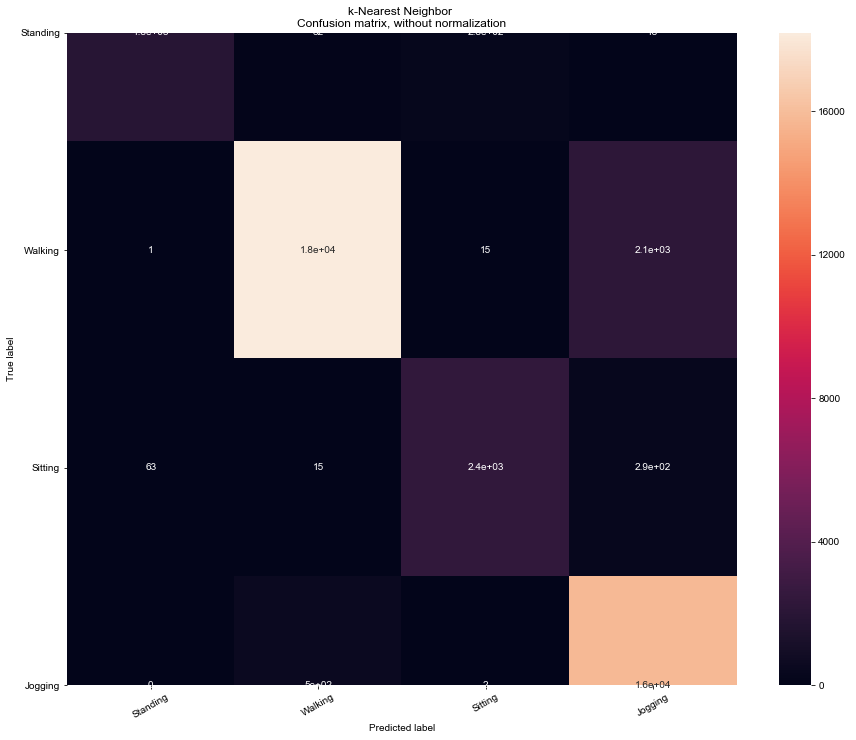

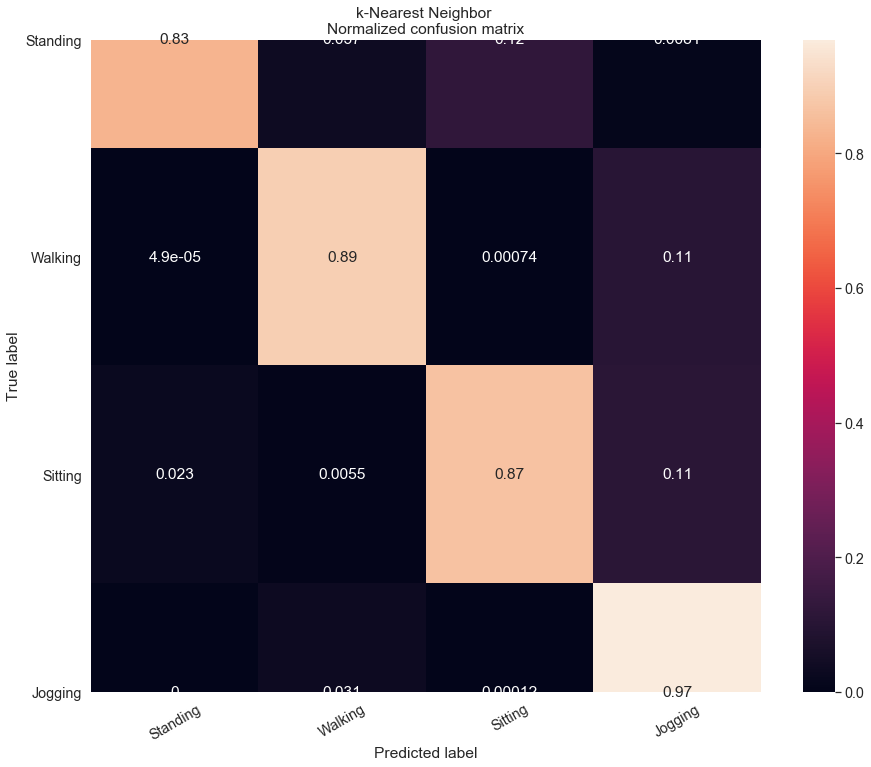


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      2226
           1       0.97      0.89      0.93     20337
           2       0.89      0.87      0.88      2742
           3       0.87      0.97      0.91     16297

    accuracy                           0.92     41602
   macro avg       0.92      0.89      0.90     41602
weighted avg       0.92      0.92      0.92     41602



In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sb
from sklearn.utils.multiclass import unique_labels

y_pred = clf1.predict(test_features)
lables = np.concatenate([target_names, ])

from sklearn.metrics import f1_score

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False, title=None):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize = (15,12))
    #Create a 2-dim array include: rows, columns, data
    dataFrame = pd.DataFrame(cm)
    #create a heatmap, annot = True: add text on each cell over heatmap
    sb.heatmap(dataFrame, annot = True)  
    ax.set(xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

    sb.set(font_scale = 1.3)

np.set_printoptions(precision=2) #lam tron

plot_confusion_matrix(test_label, y_pred, classes=lables,
        title='k-Nearest Neighbor \nConfusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(test_label, y_pred, classes=lables, normalize=True,
        title='k-Nearest Neighbor \nNormalized confusion matrix')

plt.show()
print ("\nClassification Report: ")
print (classification_report(test_label, y_pred))


4


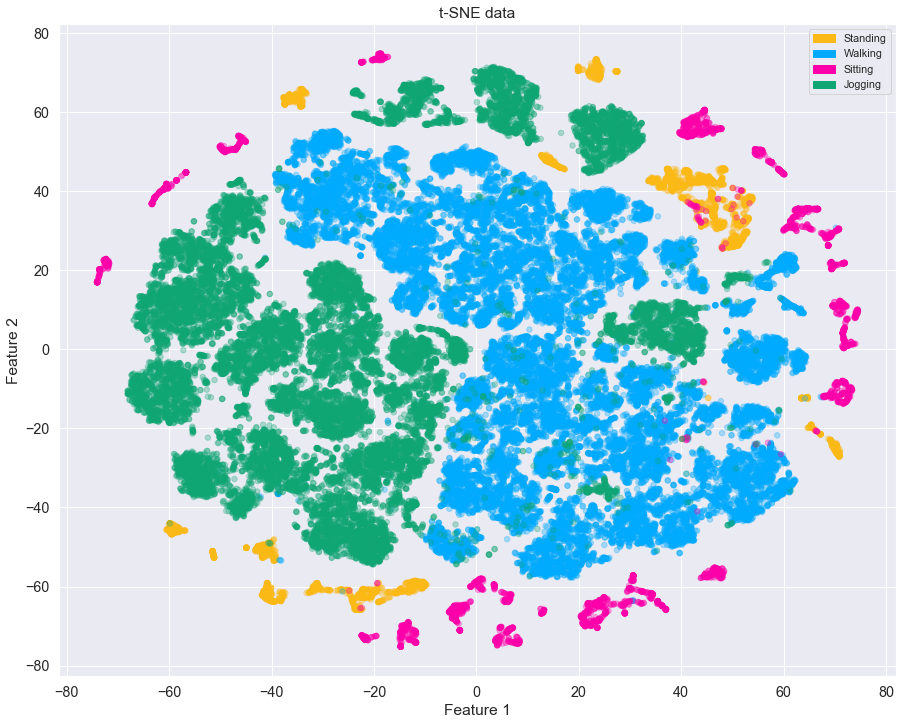

In [17]:
# t-SNE

import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import graphviz 
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches


def plot_labelled_scatter(X, y, class_labels): 
    num_labels = len(class_labels)
    print(num_labels)

    # create a mesh (lưới) to plot the boundaries (đường biên)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1   
                    # X[row, column]
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  
    
    colors = ['#fdb915', '#00AAFF', '#FF00AA','#10a674'] 
  
    cmap = ListedColormap(colors) 
    
   # Generate a colormap index based on discrete intervals
    norm = BoundaryNorm(numpy.arange(0, num_labels+1, 1), ncolors=num_labels) 
    
    plt.figure(figsize=(15, 12))
    
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=cmap, norm=norm, alpha=0.3, lw=1)
                #edgecolor='black'
    
    # Create array h[] chứa chú thích behaviors & colors tương ứng
    h = []
    for c in range(0, num_labels):
        # tạo chú thích = mpatches.Patch
        h.append(mpatches.Patch(color=colors[c], label=class_labels[c])) 
    plt.legend(handles=h, fontsize = 'x-small') # show ghi chu
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('t-SNE data')

    plt.show()
    
X_visual = train_features
y_visual = np.array(train_label, dtype=np.uint8) 

n_samples = 300
n_components = 2  # dimension
perplexity = 30.0 # number of NEAREST NEIGHBORS that used in other MALIFOLD LEARNING algorithm (value: 5-50)
RS = 1000   

from sklearn.manifold import TSNE
X_tsne = TSNE(random_state=RS, n_components=2, perplexity=30.0, learning_rate=300.0 ).fit_transform(X_visual)            
plot_labelled_scatter(X_tsne, y_visual,['Standing','Walking','Sitting','Jogging'])

In [29]:
# plot tsne orginal data

x = train_data

for i in range (len(x)):
    new = np.array(x[i])
    train = np.concatenate((train,new))
train


array([[ -1.88      ,   9.85      ,  -0.23154591],
       [ -0.19      ,   9.92      ,  -0.5720546 ],
       [ -0.61      ,  10.27      ,  -0.88532263],
       ...,
       [-14.25      ,   0.95      , -10.23      ],
       [-19.53      ,   8.66      , -13.99      ],
       [ -3.91      ,  -1.57      ,  11.14      ]])

In [33]:
type(train)
train.shape
train_features.shape

train = np.resize(train,((62415, 18)))

numpy.ndarray

(998656, 3)

(62415, 18)

4


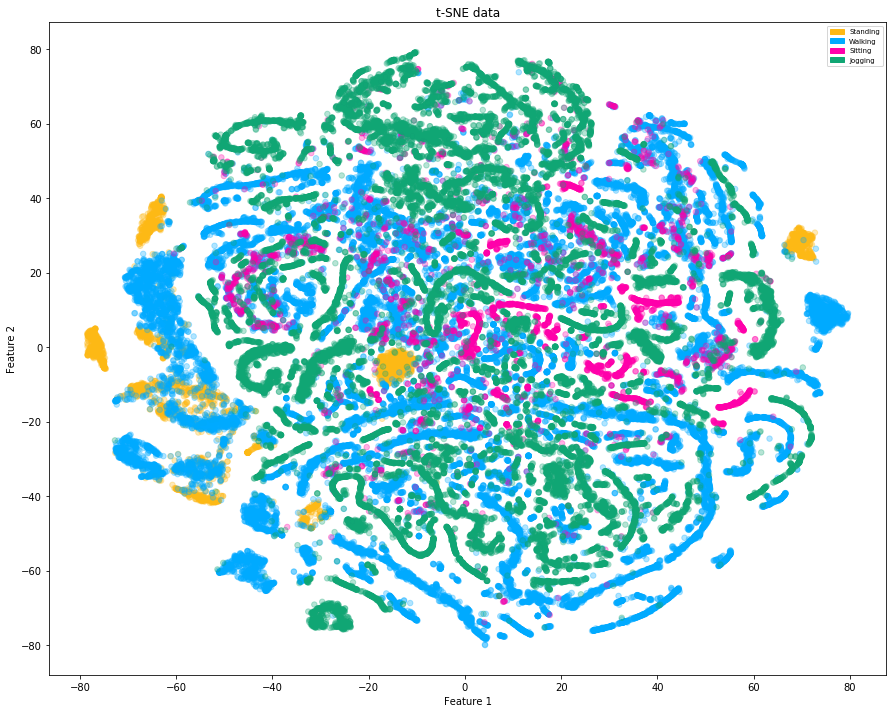

In [35]:
# t-SNE

import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import graphviz 
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches


def plot_labelled_scatter(X, y, class_labels): 
    num_labels = len(class_labels)
    print(num_labels)

    # create a mesh (lưới) to plot the boundaries (đường biên)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1   
                    # X[row, column]
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  
    
    colors = ['#fdb915', '#00AAFF', '#FF00AA','#10a674'] 
  
    cmap = ListedColormap(colors) 
    
   # Generate a colormap index based on discrete intervals
    norm = BoundaryNorm(numpy.arange(0, num_labels+1, 1), ncolors=num_labels) 
    
    plt.figure(figsize=(15, 12))
    
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=cmap, norm=norm, alpha=0.3, lw=1)
                #edgecolor='black'
    
    # Create array h[] chứa chú thích behaviors & colors tương ứng
    h = []
    for c in range(0, num_labels):
        # tạo chú thích = mpatches.Patch
        h.append(mpatches.Patch(color=colors[c], label=class_labels[c])) 
    plt.legend(handles=h, fontsize = 'x-small') # show ghi chu
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('t-SNE data')

    plt.show()
    
X_visual = train
y_visual = np.array(train_label, dtype=np.uint8) 

n_samples = 300
n_components = 2  # dimension
perplexity = 30.0 # number of NEAREST NEIGHBORS that used in other MALIFOLD LEARNING algorithm (value: 5-50)
RS = 1000   

from sklearn.manifold import TSNE
X_tsne = TSNE(random_state=RS, n_components=2, perplexity=30.0, learning_rate=300.0 ).fit_transform(X_visual)            
plot_labelled_scatter(X_tsne, y_visual,['Standing','Walking','Sitting','Jogging'])